In [1]:
import gym
import torch
import numpy as np
import matplotlib.pyplot as plt

from TD3 import TD3
from DDPG import DDPG
from DDPG2 import DDPG2

In [2]:
PATH = "/Volumes/BC_Clutch/Dropbox/DeepRLND/rl_continuous_control/"
RESULT_PATH = PATH + "results/"

In [3]:
result_list = {
               "TD3-BipedalWalker-v2-0.npy",
               "DDPG-BipedalWalker-v2-0.npy",
               "DDPG2-BipedalWalker-v2-0.npy"
              }

In [4]:
def plot_result(RESULT_PATH, result_list):
    for result in result_list:
        data = np.load(RESULT_PATH + result)
        label = result.split("-")[0]
        plt.plot(np.arange(len(data)), data, label=label)
    plt.ylabel('Reward')
    plt.xlabel('Episode')
    plt.title("Reward by Episode")
    plt.legend()

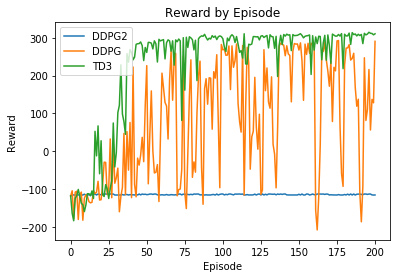

In [5]:
plot_result(RESULT_PATH, result_list)

### Run trained agent

In [ ]:
def run_agent(RESULT_PATH, env_name, agent, actor_path, critic_path):
    env = gym.make(env_name)
    agent = agent(env.observation_space.shape[0], env.action_space.shape[0], float(env.action_space.high[0]))
    agent.actor.load_state_dict(torch.load(RESULT_PATH + actor_path,map_location={'cuda:0': 'cpu'}))
    agent.critic.load_state_dict(torch.load(RESULT_PATH + critic_path,map_location={'cuda:0': 'cpu'}))

    state = env.reset()
    while True:
        action = agent.select_action(state)
        env.render()
        next_state, reward, done, _ = env.step(action)
        state = next_state
        if done:
            break

    env.close()

In [ ]:
run_agent(RESULT_PATH,"BipedalWalker-v2",DDPG,'DDPG-BipedalWalker-v2-0_actor.pth','DDPG-BipedalWalker-v2-0_critic.pth')

In [ ]:
# run_agent(RESULT_PATH,"BipedalWalker-v2",DDPG2,'DDPG2-BipedalWalker-v2-0_actor.pth','DDPG2-BipedalWalker-v2-0_critic.pth')

In [ ]:
run_agent(RESULT_PATH,"BipedalWalker-v2",TD3,'TD3-BipedalWalker-v2-0_actor.pth','TD3-BipedalWalker-v2-0_critic.pth')